In [21]:
#initialize packages 


import numpy as np 
import pandas as pd 
import matplotlib.pylab as plt
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
from sklearn.model_selection import GridSearchCV


In [22]:
#load data 

data = pd.read_csv("modeldata_classes_20000_0.02.csv")


# Split the data into input features (X) and target variable (y)
X = data.drop('Activity', axis=1)  # Input features
X = X.iloc[:, 2:]
#X = X.drop("Unnamed: 24", axis=1)
#X = X.drop("human", axis = 1)
#X= X[:10000]
y = data['Activity'] # Target variable

feature_names = X.columns.values.tolist()
print(feature_names)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, stratify=y)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size=0.9)

print(X)


['traffic-light', 'marking', 'traffic-sign', 'sign', 'human', 'concrete-block', 'snow', 'water', 'bridge', 'pedestrian-area', 'guard-rail', 'curb-cut', 'temporary', 'parking', 'bench', 'banner', 'catch-basin', 'truck', 'traffic-island', 'driveway', 'bike-lane', 'wall', 'junction-box', 'wire-group', 'manhole', 'trash-can', 'bicycle', 'terrain', 'fence', 'utility-pole', 'curb', 'sidewalk', 'car', 'building', 'vegetation', 'road', 'sky', 'pole', 'street-light']
      traffic-light  marking  traffic-sign      sign     human  \
0               0.0      0.0      0.000000  0.000000  0.000000   
1               0.0      0.0      1.000000  0.000000  0.000000   
2               0.0      0.0      1.000000  0.000000  2.000000   
3               0.0      0.0      1.000000  0.000000  2.000000   
4               0.0      0.0      0.142857  0.428571  0.714286   
...             ...      ...           ...       ...       ...   
9487            0.0      0.0      0.000000  0.000000  0.000000   
9488     

# Random grid search 

In [23]:
rfc = RandomForestClassifier(random_state=42)
print(rfc.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [24]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 400, num = 60)]

# Number of features to consider at every split
max_features = ['sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100, num = 60)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True]

max_samples = [0.4,0.5,0.6,0.7,0.8]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
                'max_samples': max_samples}
print(random_grid)

{'n_estimators': [10, 16, 23, 29, 36, 43, 49, 56, 62, 69, 76, 82, 89, 95, 102, 109, 115, 122, 128, 135, 142, 148, 155, 162, 168, 175, 181, 188, 195, 201, 208, 214, 221, 228, 234, 241, 247, 254, 261, 267, 274, 281, 287, 294, 300, 307, 314, 320, 327, 333, 340, 347, 353, 360, 366, 373, 380, 386, 393, 400], 'max_features': ['sqrt'], 'max_depth': [10, 11, 13, 14, 16, 17, 19, 20, 22, 23, 25, 26, 28, 29, 31, 32, 34, 35, 37, 38, 40, 42, 43, 45, 46, 48, 49, 51, 52, 54, 55, 57, 58, 60, 61, 63, 64, 66, 67, 69, 71, 72, 74, 75, 77, 78, 80, 81, 83, 84, 86, 87, 89, 90, 92, 93, 95, 96, 98, 100, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True], 'max_samples': [0.4, 0.5, 0.6, 0.7, 0.8]}


In [25]:

#https://www.kaggle.com/code/prashant111/random-forest-classifier-feature-importance
#https://towardsdatascience.com/understanding-feature-importance-and-how-to-implement-it-in-python-ff0287b20285

#Initialize the model 

rfc = RandomForestClassifier(random_state=42)
k = 5

#Initialize the randomizedSeachCV using the parameter grid and model 
rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 300, cv = k, verbose=0, random_state=42, n_jobs = -1)

X_train_val = X_train + X_valid
y_train_val = y_train + y_valid

# Fit the random search model
rfc_random.fit(X_train, y_train)

best_iteration_indices = []
parameters_for_grid = {'n_estimators': [],
               'max_features': [],
               'max_depth': [],
               'min_samples_split': [],
               'min_samples_leaf': [],
               'bootstrap': [],
                'max_samples': []}

#print(rfc_random.cv_results_) 
for i in range(0,k):
    print(f"Fold {i+1}:")
    best_value = np.argmax(rfc_random.cv_results_[f"split{i}_test_score"])
    best_iteration_indices.append(best_value)
    best_accuracy = rfc_random.cv_results_[f"split{i}_test_score"][best_value]
    best_params = rfc_random.cv_results_['params'][best_value]
    for key in best_params:
        if best_params[key] not in parameters_for_grid[key]:
            parameters_for_grid[key].append(best_params[key])
    #mean_accuracy = rfc_random.cv_results_['mean_test_score'][best_value]
    print(f"Best Accuracy in fold {i+1}:", best_accuracy)
    print("Best Parameter:", best_params)
    print("Indices for best accuracy in fold:", best_value)
    #print(f"Mean Accuracy in fold {i+1}:", mean_accuracy)
    print()


mean_test_rand = []    
for i in best_iteration_indices:
    mean_accuracy = rfc_random.cv_results_["mean_test_score"][i]
    mean_test_rand.append(mean_accuracy)
    print(f"Mean test score across folds for candidate {i}:", mean_accuracy)
    
print(best_iteration_indices)
#print(rfc_random.cv_results_)    
#Predict and confusion matrix    
    
pred = rfc_random.predict(X_test)

accuracy_score(y_test,pred)

print(confusion_matrix(y_test,pred))



Fold 1:
Best Accuracy in fold 1: 0.4864667154352597
Best Parameter: {'n_estimators': 327, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_samples': 0.8, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': True}
Indices for best accuracy in fold: 82

Fold 2:
Best Accuracy in fold 2: 0.4893928310168252
Best Parameter: {'n_estimators': 353, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_samples': 0.4, 'max_features': 'sqrt', 'max_depth': 14, 'bootstrap': True}
Indices for best accuracy in fold: 99

Fold 3:
Best Accuracy in fold 3: 0.4806144842721288
Best Parameter: {'n_estimators': 247, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_samples': 0.6, 'max_features': 'sqrt', 'max_depth': 72, 'bootstrap': True}
Indices for best accuracy in fold: 265

Fold 4:
Best Accuracy in fold 4: 0.48755490483162517
Best Parameter: {'n_estimators': 314, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_samples': 0.5, 'max_features': 'sqrt', 'max_depth': 40, 'bootstrap': True}
Indices for

In [26]:
print(parameters_for_grid['n_estimators'])
n_estimaters_grid = []
n_estimaters_grid.append(round(np.quantile(parameters_for_grid['n_estimators'], 0)))
n_estimaters_grid.append(round(np.quantile(parameters_for_grid['n_estimators'], 0.25)))
n_estimaters_grid.append(round(np.quantile(parameters_for_grid['n_estimators'], 0.5)))
n_estimaters_grid.append(round(np.quantile(parameters_for_grid['n_estimators'], 0.75)))
n_estimaters_grid.append(round(np.quantile(parameters_for_grid['n_estimators'], 1)))


max_depth_grid = []
max_depth_grid.append(round(np.quantile(parameters_for_grid['max_depth'], 0)))
max_depth_grid.append(round(np.quantile(parameters_for_grid['max_depth'], 0.25)))
max_depth_grid.append(round(np.quantile(parameters_for_grid['max_depth'], 0.5)))
max_depth_grid.append(round(np.quantile(parameters_for_grid['max_depth'], 0.75)))
max_depth_grid.append(round(np.quantile(parameters_for_grid['max_depth'], 1)))


print(max_depth_grid)

[327, 353, 247, 314, 333]
[10, 13, 27, 48, 72]


# Grid search 

In [27]:
# Create the parameter grid based on the results of random search 

grid_grid = {
    'bootstrap': parameters_for_grid['bootstrap'],
    'max_depth': parameters_for_grid['max_depth'],
    'max_features': ['sqrt'],
    'min_samples_leaf': parameters_for_grid['min_samples_leaf'],
    'min_samples_split': parameters_for_grid['min_samples_split'],
    'n_estimators': parameters_for_grid['n_estimators'],
    'max_samples': parameters_for_grid['max_samples']
}
print(grid_grid)

rfc = RandomForestClassifier(random_state=42)
k = 5 

rfc_grid = GridSearchCV(estimator = rfc, param_grid = grid_grid, 
                          cv = k, n_jobs = -1, verbose = 0)

rfc_grid.fit(X_train, y_train)

best_iteration_indices_grid = []

 
for i in range(0,k):
    print(f"Fold {i+1}:")
    best_value = np.argmax(rfc_grid.cv_results_[f"split{i}_test_score"])
    best_iteration_indices_grid.append(best_value)
    best_accuracy = rfc_grid.cv_results_[f"split{i}_test_score"][best_value]
    best_params = rfc_grid.cv_results_['params'][best_value]
    #mean_accuracy = rfc_random.cv_results_['mean_test_score'][best_value]
    print(f"Best Accuracy in fold {i+1}:", best_accuracy)
    print("Best Parameter:", best_params)
    print("Indices for best accuracy in fold:", best_value)
    #print(f"Mean Accuracy in fold {i+1}:", mean_accuracy)

print(best_iteration_indices_grid)

mean_test_grid = []
for i in best_iteration_indices_grid:
    mean_accuracy = rfc_grid.cv_results_["mean_test_score"][i]
    mean_test_grid.append(mean_accuracy)
    print(f"Mean test score across folds for candidate {i}:", mean_accuracy)
    

    
pred_grid = rfc_grid.predict(X_test)

accuracy_score(y_test,pred)

print(confusion_matrix(y_test,pred_grid))


print(5*(len(parameters_for_grid['bootstrap'])*len(parameters_for_grid['max_depth'])*len(parameters_for_grid['min_samples_leaf'])*len(parameters_for_grid['min_samples_split'])*len(parameters_for_grid['n_estimators'])*len(parameters_for_grid['max_samples'])))


{'bootstrap': [True], 'max_depth': [10, 14, 72, 40], 'max_features': ['sqrt'], 'min_samples_leaf': [4, 2], 'min_samples_split': [2, 5, 10], 'n_estimators': [327, 353, 247, 314, 333], 'max_samples': [0.8, 0.4, 0.6, 0.5]}
Fold 1:
Best Accuracy in fold 1: 0.48719824433065106
Best Parameter: {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'max_samples': 0.4, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 247}
Indices for best accuracy in fold: 52
Fold 2:
Best Accuracy in fold 2: 0.49378200438917336
Best Parameter: {'bootstrap': True, 'max_depth': 14, 'max_features': 'sqrt', 'max_samples': 0.5, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 353}
Indices for best accuracy in fold: 221
Fold 3:
Best Accuracy in fold 3: 0.4806144842721288
Best Parameter: {'bootstrap': True, 'max_depth': 14, 'max_features': 'sqrt', 'max_samples': 0.4, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 327}
Indices for best accuracy in fold: 170
Fold 4:
Be

# Model 

Test set accuracy: 0.4576092680358083
Out of bag score 0.4823649934143129
Out of bag decision function [[0.35229811 0.32501151 0.32269038]
 [0.30957581 0.33854506 0.35187913]
 [0.06948948 0.14620744 0.78430308]
 ...
 [0.35364498 0.32603436 0.32032067]
 [0.46105027 0.31879405 0.22015568]
 [0.39951731 0.31827073 0.28221197]]
6833
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 40, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': 0.5, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 314, 'n_jobs': None, 'oob_score': True, 'random_state': None, 'verbose': 0, 'warm_start': False}
Confusion matrix random search: 
 [[380 101 145]
 [291 159 177]
 [203 113 330]]
Model feature importances: [0.06809061230819828, 0.05877974034799872, 0.05809529790693035, 0.0463344491772575, 0.045607202822111725, 0.043655630496338416, 0.042920275996591144, 0.03843944072808794, 0.

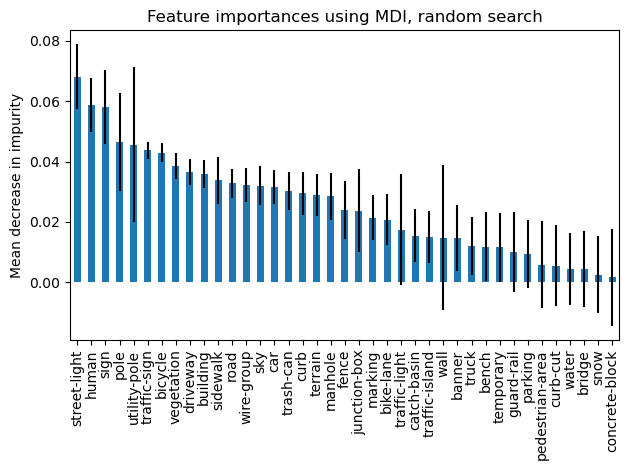

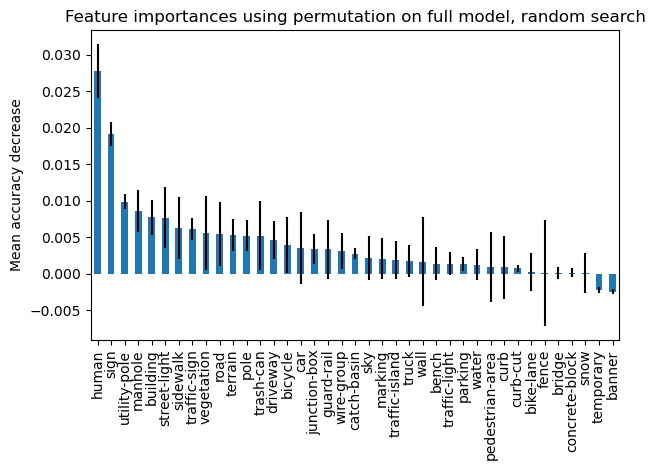

human                         0.028 +/- 0.007
sign                          0.019 +/- 0.006
utility-pole                  0.010 +/- 0.004
manhole                       0.009 +/- 0.003
building                      0.008 +/- 0.002
sidewalk                      0.006 +/- 0.002
terrain                       0.005 +/- 0.003
driveway                      0.005 +/- 0.002
guard-rail                    0.003 +/- 0.001


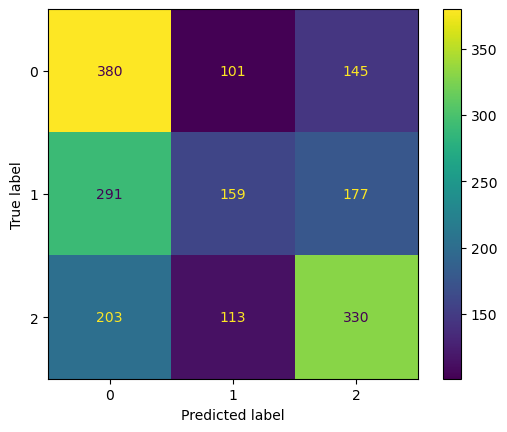

In [28]:
#split data

#define parameters

#random 

best_test = np.argmax(mean_test_rand)
best_test_i = best_iteration_indices[best_test]
best_param = rfc_random.cv_results_['params'][best_test_i]

model_rand = RandomForestClassifier(**best_param,oob_score=True)
model_rand.fit(X_train, y_train)

y_pred_rand = model_rand.predict(X_test)

# Evaluate the model's performance on the test set
accuracy_rand = accuracy_score(y_test, y_pred_rand)
print("Test set accuracy:", accuracy_rand)
print("Out of bag score", model_rand.oob_score_)
print("Out of bag decision function", model_rand.oob_decision_function_)
print(len(model_rand.oob_decision_function_))
print(model_rand.get_params())

print("Confusion matrix random search: \n",  confusion_matrix(y_test,y_pred_rand))


print("Model feature importances:", sorted(model_rand.feature_importances_,reverse=True))
print("Model feature importances names:", [model_rand.feature_names_in_[i] for i in sorted(range(len(model_rand.feature_importances_)), key=lambda k: model_rand.feature_importances_[k], reverse=True)])


importances = model_rand.feature_importances_
std = np.std([tree.feature_importances_ for tree in model_rand.estimators_], axis=0)

forest_importances = pd.Series(importances, index=feature_names)
sorted_importances = forest_importances.sort_values(ascending=False)  # Sorting the importances

sorted_feature_names = sorted_importances.index  # Sorting the feature names based on importances

fig, ax = plt.subplots()
sorted_importances.plot.bar(yerr=std[sorted_importances.index.get_indexer(sorted_feature_names)], ax=ax)  # Using sorted importances and corresponding std
ax.set_title("Feature importances using MDI, random search")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
plt.show()


from sklearn.inspection import permutation_importance

result = permutation_importance(
    model_rand, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)

forest_importances_perm = pd.Series(result.importances_mean, index=feature_names)

sorted_importances_perm = forest_importances_perm.sort_values(ascending=False)  # Sorting the importances

sorted_feature_names_perm = forest_importances_perm.index  # Sorting the feature names based on importances


#print(result)    
fig, ax = plt.subplots()
sorted_importances_perm.plot.bar(yerr=result.importances_std[sorted_importances_perm.index.get_indexer(sorted_feature_names_perm)], ax=ax)
ax.set_title("Feature importances using permutation on full model, random search")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()



for i in result.importances_mean.argsort()[::-1]:
     if result.importances_mean[i] - 2 * result.importances_std[i] > 0:
        print(f"{feature_names[i]:<30}"
               f"{result.importances_mean[i]:.3f}"
              f" +/- {result.importances_std[i]:.3f}")
        
cm_rand = confusion_matrix(y_test, y_pred_rand, labels=model_rand.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_rand,display_labels=model_rand.classes_)
disp.plot()
plt.show()

Test set accuracy: 0.4555028962611901
Out of bag score 0.4776818381384458
Out of bag decision function [[0.36487406 0.32556065 0.30956529]
 [0.29495198 0.32075555 0.38429247]
 [0.04845242 0.11287428 0.8386733 ]
 ...
 [0.3642806  0.32839829 0.30732112]
 [0.44592177 0.30932137 0.24475686]
 [0.38614308 0.32217375 0.29168317]]
6833
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 14, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': 0.4, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 327, 'n_jobs': None, 'oob_score': True, 'random_state': None, 'verbose': 0, 'warm_start': False}
Confusion matrix gridsearch: 
 [[396  98 132]
 [315 142 170]
 [227  92 327]]
Model feature importances: [0.05966805033020975, 0.05423314850557377, 0.05289476058026936, 0.04501377863258063, 0.0438436684507375, 0.04195439443234324, 0.04070667251304875, 0.03904686742144885, 0.0388740

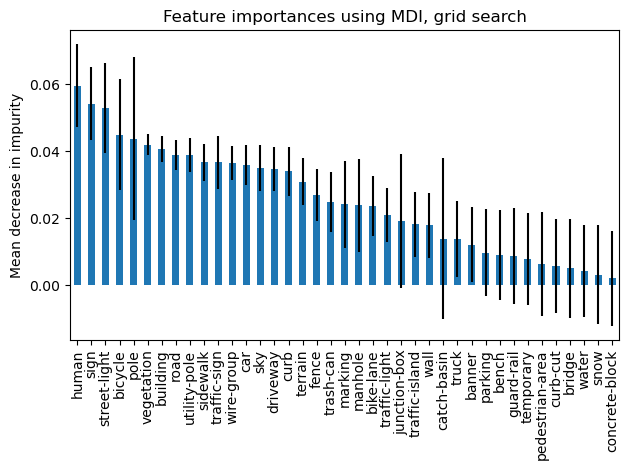

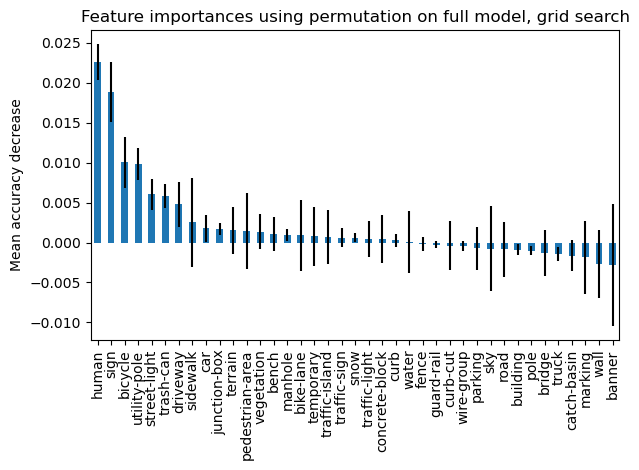

human                         0.023 +/- 0.008
sign                          0.019 +/- 0.005
bicycle                       0.010 +/- 0.005
utility-pole                  0.010 +/- 0.005
trash-can                     0.006 +/- 0.003


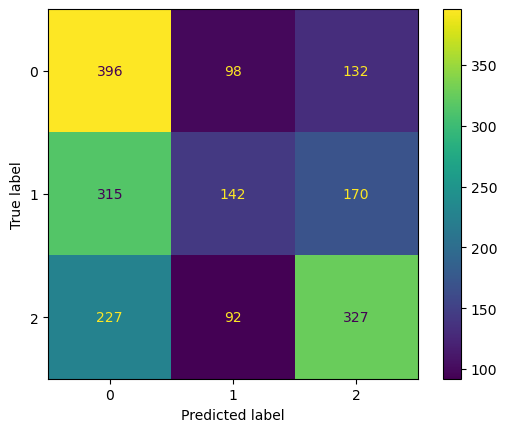

In [29]:
#Grid

best_test = np.argmax(mean_test_grid)
best_test_i = best_iteration_indices_grid[best_test]
best_param_grid = rfc_grid.cv_results_['params'][best_test_i]

model_grid = RandomForestClassifier(**best_param_grid,oob_score=True)
model_grid.fit(X_train, y_train)

y_pred_grid = model_grid.predict(X_test)

# Evaluate the model's performance on the test set
accuracy_grid = accuracy_score(y_test, y_pred_grid)
print("Test set accuracy:", accuracy_grid)
print("Out of bag score", model_grid.oob_score_)
print("Out of bag decision function", model_grid.oob_decision_function_)
print(len(model_grid.oob_decision_function_))
print(model_grid.get_params())

print("Confusion matrix gridsearch: \n", confusion_matrix(y_test,y_pred_grid))

print("Model feature importances:", sorted(model_grid.feature_importances_,reverse=True))
print("Model feature importances names:", [model_grid.feature_names_in_[i] for i in sorted(range(len(model_rand.feature_importances_)), key=lambda k: model_rand.feature_importances_[k], reverse=True)])

importances = model_grid.feature_importances_
std = np.std([tree.feature_importances_ for tree in model_grid.estimators_], axis=0)

forest_importances = pd.Series(importances, index=feature_names)
sorted_importances = forest_importances.sort_values(ascending=False)  # Sorting the importances

sorted_feature_names = sorted_importances.index  # Sorting the feature names based on importances

fig, ax = plt.subplots()
sorted_importances.plot.bar(yerr=std[sorted_importances.index.get_indexer(sorted_feature_names)], ax=ax)  # Using sorted importances and corresponding std
ax.set_title("Feature importances using MDI, grid search")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
plt.show()


from sklearn.inspection import permutation_importance

result = permutation_importance(
    model_grid, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)

forest_importances_perm = pd.Series(result.importances_mean, index=feature_names)

sorted_importances_perm = forest_importances_perm.sort_values(ascending=False)  # Sorting the importances

sorted_feature_names_perm = forest_importances_perm.index  # Sorting the feature names based on importances


#print(result)    
fig, ax = plt.subplots()
sorted_importances_perm.plot.bar(yerr=result.importances_std[sorted_importances_perm.index.get_indexer(sorted_feature_names_perm)], ax=ax)
ax.set_title("Feature importances using permutation on full model, grid search")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()



for i in result.importances_mean.argsort()[::-1]:
     if result.importances_mean[i] - 2 * result.importances_std[i] > 0:
        print(f"{feature_names[i]:<30}"
               f"{result.importances_mean[i]:.3f}"
              f" +/- {result.importances_std[i]:.3f}")
        
cm_grid = confusion_matrix(y_test, y_pred_grid, labels=model_grid.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_grid,display_labels=model_grid.classes_)
disp.plot()
plt.show()

In [30]:
## Dummy classifier 
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X, y)
dummy_clf.score(X, y)

0.33997050147492625